In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from tkinter import Tk
import glob
import os

In [2]:
english_words = pd.read_excel("./isitword test/ref/wordorderen_full.xlsx")
thai_words = pd.read_excel("./isitword test/ref/wordorderth_full.xlsx")

# Define function for data preparation

In [3]:
# cleaning df
def cutdf(prepdf):
    cutdf = prepdf.iloc[1:121][["lang","imageid","stimuli","key_resp.keys","key_resp.rt"]].reset_index(drop=True)
    return cutdf

In [4]:
# Score calculation function
def calculate_score(df):
    conditions = [
        (df['key_resp.keys'] == 'z') & (df['stimuli'] == 1),
        (df['key_resp.keys'] == 'x') & (df['stimuli'].isin([2, 3]))
    ]
    values = [1, 1]
    df['score'] = np.select(conditions, values, default=0)
    return df


In [5]:
def convert_stimuli(df):
    stimuli_map = {1: 'Correct', 2: 'Scramble', 3: 'Pseudo'}
    df['stimuli'] = df['stimuli'].map(stimuli_map)
    return df


In [6]:
# Word length calculation function
def get_word_length(df, words_df):
    word_length_dict = words_df.set_index('imageid')['word shown'].astype(str).apply(len).to_dict()
    df['word_length'] = df['imageid'].map(word_length_dict)
    df['word_shown'] = words_df["word shown"]
    return df


# getting all subject files and clean as usual

In [14]:

import glob
import os

path = './data/global isitword test/'
all_files = glob.glob(os.path.join(path , "*.csv"))

normlist, normthlist, normenlist = [], [], []

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('global isitword test\\')[1].split('_')
    username = user_lang_list[0]
    lang = user_lang_list[1]

    df = pd.read_csv(filename, index_col=None, header=0)
    df = cutdf(df)
    df = calculate_score(df)
    df = convert_stimuli(df)
    if df['lang'].mean() == 1:
        df = get_word_length(df, thai_words)
        normthlist.append(df)
    elif df['lang'].mean() == 2:
        df = get_word_length(df, english_words)
        normenlist.append(df)
    else:
        print("data file corrupted, please check manually at:", filename)
        break
    
    df['username'] = username

    normlist.append(df)

if len(normlist) == len(normenlist) + len(normthlist) and len(normenlist) == len(normthlist):
    n_subj = len(normenlist)
    print("validity = OK!")
else:
    print("caution,",len(normlist),"lists discrepancy compared to", len(normenlist),"and", len(normthlist) )

validity = OK!


# read patient file and clean as usual

In [20]:


patientpath = "./data/patient isitword test/"
all_patientfiles = glob.glob(os.path.join(patientpath , "*.csv"))

ptth = pd.read_csv(all_patientfiles[1])
pten = pd.read_csv(all_patientfiles[0])

def tenderizer(df):
    cut_df = cutdf(df)
    cut_df = calculate_score(cut_df)
    cut_df = convert_stimuli(cut_df)
    return cut_df

ptth = tenderizer(ptth)
pten = tenderizer(pten)
get_word_length(ptth, thai_words)
get_word_length(pten, english_words)

,lang,imageid,stimuli,key_resp.keys,key_resp.rt,score,word_length,word_shown
0,2.0,66.0,Correct,x,1.225603,0,6,eraser
1,2.0,3.0,Correct,z,1.055439,1,3,cat
2,2.0,71.0,Scramble,x,1.368090,1,6,kiooce
3,2.0,27.0,Pseudo,x,3.941805,1,4,coot
4,2.0,88.0,Pseudo,x,0.740051,1,7,podlana
...,...,...,...,...,...,...,...,...
115,2.0,10.0,Correct,z,4.066097,1,3,bat
116,2.0,8.0,Pseudo,x,7.806508,1,3,sus
117,2.0,94.0,Pseudo,x,12.392624,1,7,giandto
118,2.0,11.0,Scramble,x,2.903643,1,3,jgu


# Remove unknown word for patient and everyone 

In [22]:
# List of words to exclude
exclude_words = ["pear", "hose", "drill", "couch"] # notice, hose is a new word in task 3, in which task 2 is not used

# Filter English patient dataset
def remove_unknown(df, list):
    filtered_df = df[~df['word_shown'].isin(list)]
    return filtered_df



# Filter English normal dataset
normenlist_f = []
for i in normenlist:
    df = remove_unknown(i, exclude_words)
    normenlist_f.append(df)

pten_f = remove_unknown(pten, exclude_words)

# combine dataframe for calculating overall mean or whatever I want to

In [90]:
ptall = pd.concat([ptth, pten_f], ignore_index=True)
normen = pd.concat([i for i in normenlist_f], ignore_index=True)
normth = pd.concat([i for i in normthlist], ignore_index=True)
normall = pd.concat([normth, normen], ignore_index=True)

# Function to plot graphs
def save_plot(title):
    file_path = f"./figure/norm/II {title}.png"
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Coloring variable
caution: color are not finalized!

In [25]:
redgradient = ["#ffa5bb","#ff9eb6", "#ff7d9d", "#ff6087","#ff0040" ] # thai language, use the last index value as the main color
thaicolor = redgradient[2]
bluegradient = ["#c0d7ff", "#92bcff", "#5e9eff","#3686ff","#0067ff" ] # english language, use the last index value as the main color
engcolor = bluegradient[2]
gaygradient = ["#949494", '#727272', '#4b4b4b', '#484848', '#373737'] # overall gradient
colincorrect = '#ff6962'
colcorrect  = '#77dd76'
patient = '#fc6600'

# ALL CODES BELOW GENERATE GRAPH

notice: `normen, normth, normall` for dataframe that combined everyone, `normenlist_f, normthlist` is a list that contains dataframe separated by user

`ptth` and `pten_f` and `ptall` for patient data



## _legend dupe removal_


In [26]:
def legend_unique(prop = None):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Removes duplicates
    plt.legend(unique_labels.values(), unique_labels.keys(), prop = prop)

In [27]:
stimuli_ord = ["Correct", "Scramble", "Pseudo"]

## %correct vs lang

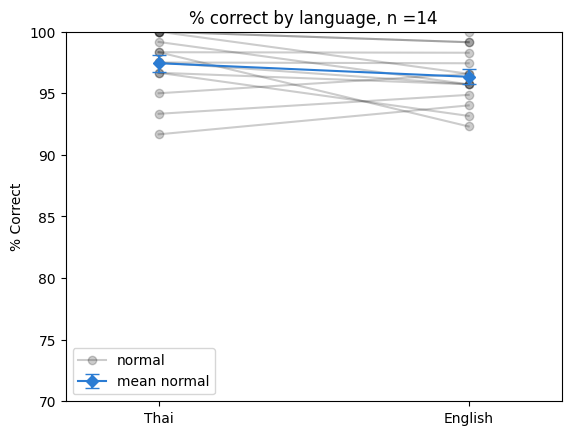

In [91]:
# Plot percentage correct per language

normalaccu = normall.groupby(['lang', 'username'])['score'].mean().mul(100).unstack()

for i, (ind, series) in enumerate(normalaccu.items()):
    plt.plot(series.index, series.values, alpha = 0.2, color = 'black', marker = 'o', label = 'normal')
    # for lang, val in series.items():
    #     plt.text(lang, val, ind)

# calculate list of mean first for each language
thmean = normth.groupby(['username'])['score'].mean().mul(100)
enmean = normen.groupby(['username'])['score'].mean().mul(100)
plt.errorbar([1,2], [normth['score'].mean() *100, normen['score'].mean() *100], yerr = [thmean.sem(), enmean.sem()] , color = normcolor , marker = 'D', capsize = 5, label = 'mean normal')

# plt.plot([1,2], [ptth['score'].mean() * 100, pten_f['score'].mean() * 100],  color = patient,marker = 'o', label = "patient")

plt.ylabel("% Correct")
plt.xticks([1,2], ["Thai", "English"])
plt.title(f"% correct by language, n ={n_subj}")
plt.margins(x=0.3, y= 5)
plt.ylim(70,100)
# save_plot("percentage correct by language")

legend_unique()

# plt.savefig("./figure/norm/II norm accu by lang.png")


%correct vs length

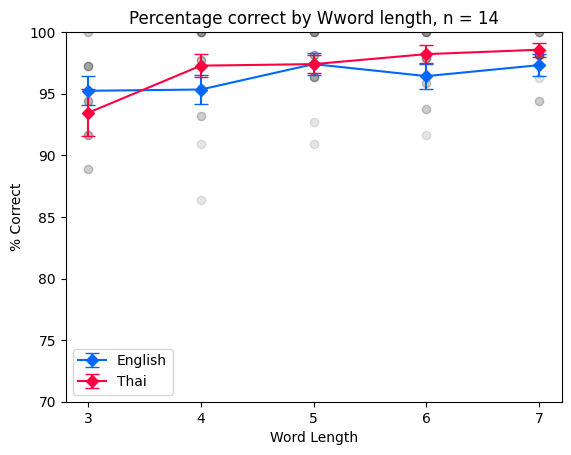

In [94]:
# Word length vs % correct
import random
# all data by user
norm_df = normall.groupby(['username', 'word_length'])['score'].mean().mul(100).unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, alpha = 0.1, color = 'black', marker = 'o')
    # for lang, val in accubylen.items():
        # plt.text(lang, val + random.uniform(-0.5,0.5), user)
e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normen.groupby('word_length')['score'].mean() * 100
sem_df = normen.groupby('word_length')['score'].sem() *100
plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = bluegradient[4], marker =  'D', capsize = 5, label = 'English')

mean_df = normth.groupby('word_length')['score'].mean() * 100
sem_df = normth.groupby('word_length')['score'].sem() *100
plt.errorbar(mean_df.index, mean_df.values, yerr = sem_df.values, color = redgradient[4], marker =  'D', capsize = 5, label = 'Thai')
# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
# patientmean_df = ptall.groupby('word_length')['score'].mean().mul(100)
# plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylim(70,100)
plt.ylabel("% Correct")
plt.xlabel("Word Length")
plt.title(f"Percentage correct by Wword length, n = {n_subj}")


plt.xticks(x)
legend_unique()
# plt.savefig("./figure/norm/II norm accu by wordlen.png")


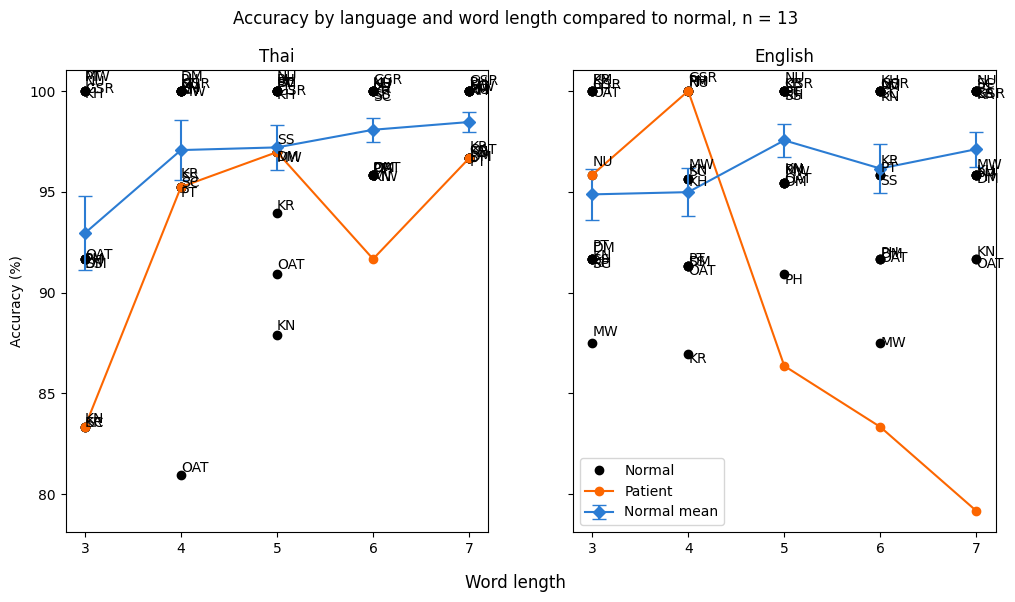

In [81]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten_f]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')
        for vu, vv in v.items():
            axs[i].text(vu, vv + random.uniform(-0.5,0.5), s)
    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['score'].mean().mul(100)
    s = lister[i][1].groupby(['word_length'])['score'].sem().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by language and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()

# plt.savefig("./figure/norm/II norm accu by wordlen and lang.png")


In [24]:
pten_f.groupby(['stimuli', 'score'])['score'].size().unstack()
test = ptth[ptth['stimuli'] == 'Pseudo']
test.groupby(['word_length', 'score'])['score'].size().unstack().fillna(0)

score,0,1
word_length,,
3,2.0,2.0
4,1.0,6.0
5,0.0,11.0
6,1.0,7.0
7,0.0,10.0


stimuli         Correct      Pseudo  Scramble
word_length                                  
3            100.000000   50.000000     100.0
4            100.000000   85.714286     100.0
5             90.909091  100.000000     100.0
6             87.500000   87.500000     100.0
7             90.000000  100.000000     100.0
stimuli      Correct  Pseudo  Scramble
word_length                           
3              100.0    87.5     100.0
4              100.0   100.0     100.0
5               50.0   100.0     100.0
6               62.5   100.0      87.5
7               50.0    87.5     100.0


Text(0.5, 0.98, 'accuracy by language, word length, and stimuli type, n = 13')

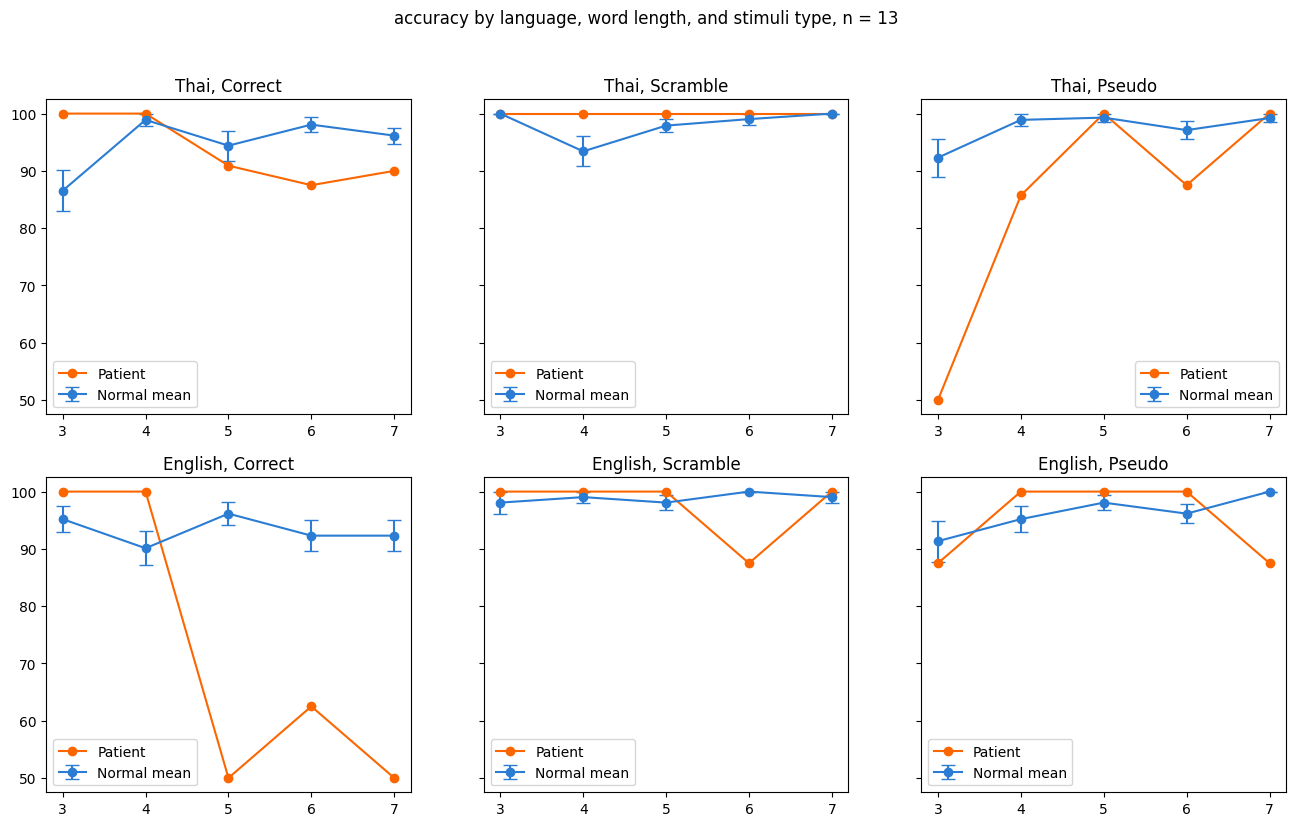

In [87]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (16,9), sharey=True)
lister = [[normth, ptth] , [normen, pten_f]]
for i in [0,1]:

    # normal
    d = lister[i][0].groupby(['stimuli','word_length', 'username'])['score'].mean().mul(100)
    m = d.groupby(['stimuli','word_length']).agg(['mean', 'sem']).unstack()
    meandf = m['mean'].T
    semdf = m['sem'].T

    # patient
    p = lister[i][1].groupby(['stimuli','word_length'])['score'].mean().mul(100).unstack().T

    print(p)
    for j in [0,1,2]:
        lang = 'Thai' if i == 0 else 'English'
        axs[i, j].errorbar(meandf[stimuli_ord[j]].index, meandf[stimuli_ord[j]].values, yerr = semdf[stimuli_ord[j]].values, 
                           color = normcolor, marker = 'o', capsize = 5, label = f'Normal mean')
        axs[i, j].plot(p[stimuli_ord[j]].index, p[stimuli_ord[j]].values, 
                           color = patient, marker = 'o', label = f'Patient')
        axs[i, j].legend()
        axs[i, j].set_title(f"{lang}, {stimuli_ord[j]}")
plt.suptitle(f"accuracy by language, word length, and stimuli type, n = {n_subj}")



# # plt.savefig("./figure/norm/II norm accu by wordlen and lang.png")


%correct vs stimuli

username    DM    GSR     KH    KN    KR     MW     NU   OAT     PH     PM  \
stimuli                                                                      
Correct   97.5  100.0  100.0  90.0  90.0  100.0  100.0  82.5   97.5   97.5   
Scramble  97.5  100.0  100.0  95.0  97.5   97.5  100.0  95.0  100.0  100.0   
Pseudo    95.0  100.0  100.0  95.0  97.5   97.5  100.0  97.5  100.0   97.5   

username     PN     PT    SC    SS  
stimuli                             
Correct   100.0   95.0  97.5  95.0  
Scramble  100.0   97.5  97.5  97.5  
Pseudo    100.0  100.0  97.5  97.5  


C:\Users\UserPC\AppData\Local\Temp\ipykernel_21060\1101870271.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(normmean[1].index, normmean[1], yerr = normsem[1], color = redgradient[4], marker = 'D', capsize = 5 , label = 'Thai')
C:\Users\UserPC\AppData\Local\Temp\ipykernel_21060\1101870271.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.errorbar(normmean[2].index, normmean[2], yerr = normsem[2], color = bluegradient[4], marker = 'D', capsize = 5 , label = 'English')


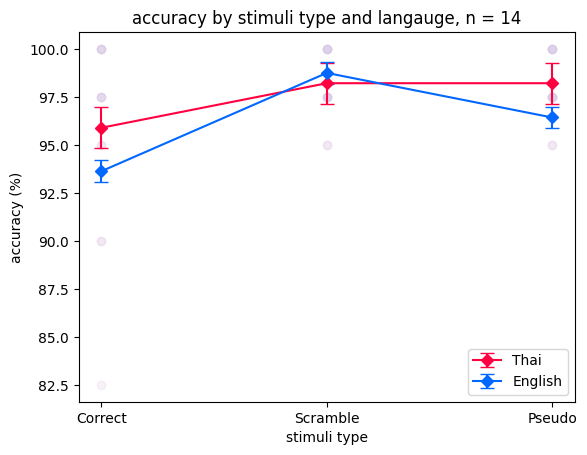

In [88]:
# normal
th_only = normall[normall['lang'] == 1]
normmean_th = th_only.groupby(['stimuli', 'username'])['score'].mean().mul(100).unstack()
normmean_th = normmean_th.reindex(stimuli_ord, level='stimuli')
print(normmean_th)

en_only = normall[normall['lang'] == 1]
normmean_en = en_only.groupby(['stimuli', 'username'])['score'].mean().mul(100).unstack()
normmean_en = normmean_en.reindex(stimuli_ord, level='stimuli')


for ind, ser in normmean_th.items():
    plt.scatter(ser.index, ser.values, color = redgradient[0], alpha = 0.1)
    # for stim, val in ser.items():
    #     plt.text(stim, val, ind)

for ind, ser in normmean_en.items():
    plt.scatter(ser.index, ser.values, color = bluegradient[0], alpha = 0.1)
    # for stim, val in ser.items():
    #     plt.text(stim, val, ind)


# normal mean
normmean = normall.groupby(['stimuli', 'lang'])['score'].mean().mul(100).unstack()
normmean = normmean.reindex(stimuli_ord, level='stimuli')

normsem = normall.groupby(['stimuli', 'lang'])['score'].sem().mul(100)
normsem = normsem.reindex(stimuli_ord, level='stimuli')

plt.errorbar(normmean[1].index, normmean[1], yerr = normsem[1], color = redgradient[4], marker = 'D', capsize = 5 , label = 'Thai')
plt.errorbar(normmean[2].index, normmean[2], yerr = normsem[2], color = bluegradient[4], marker = 'D', capsize = 5 , label = 'English')
# patient
# ptmean = ptall.groupby('stimuli')['score'].mean().mul(100)
# ptmean = ptmean.reindex(stimuli_ord, level = 'stimuli')
# plt.plot(ptmean.index, ptmean.values, color = patient, marker = 'o',label = 'patient')
plt.title(f"accuracy by stimuli type and langauge, n = {n_subj}")
plt.ylabel("accuracy (%)")
plt.xlabel("stimuli type")
legend_unique()

# plt.savefig("./figure/norm/II norm accu by stimuli.png")


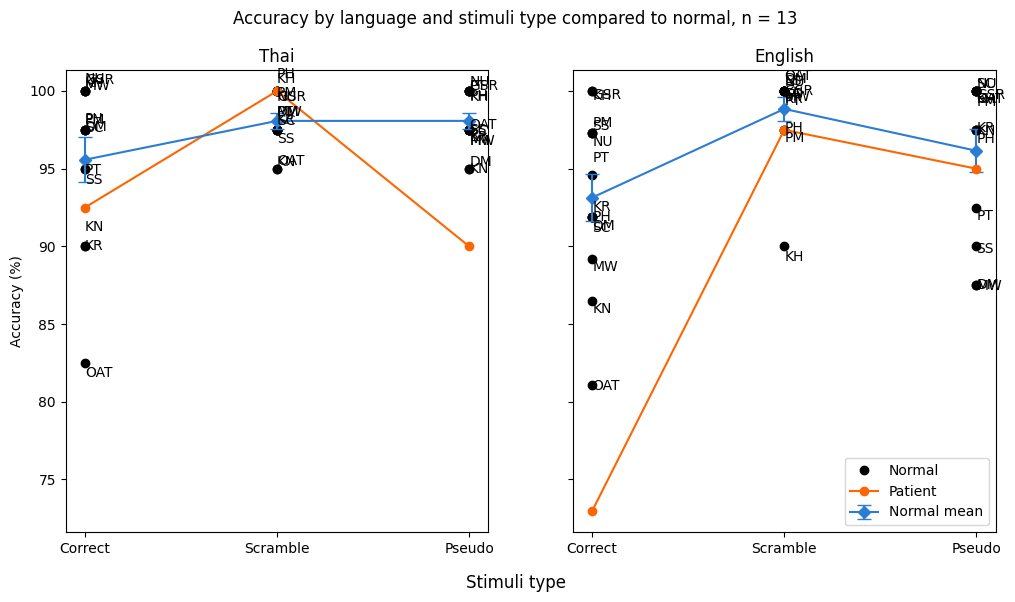

In [98]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten_f]]
for i in [0,1]:

    d = lister[i][0].groupby(['stimuli', 'username'])['score'].mean().mul(100).unstack()
    d = d.reindex(stimuli_ord, level= 'stimuli')
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')
        for vl, vv in v.items():
            axs[i].text(vl, vv + random.uniform(-1,1), s)
        
    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')

    p = lister[i][1].groupby(['stimuli'])['score'].mean().mul(100)
    p = p.reindex(stimuli_ord, level='stimuli')
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by language and stimuli type compared to normal, n = {n_subj}")
fig.supxlabel("Stimuli type")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
# axs[0].set_xticks([3,4,5,6,7])
# axs[1].set_xticks([3,4,5,6,7])
legend_unique()

# plt.savefig("./figure/norm/II norm accu by stimuli and lang.png")


# Reactime vs lang

In [95]:
# filter onlt correct reaction time
normall_filter = normall[normall['score'] == 1]
normth_filter = normth[normth['score'] == 1]
normen_filter = normen[normen['score'] == 1]
ptall_filter = ptall[ptall['score'] == 1]
pten_filter = pten_f[pten_f['score'] == 1]
ptth_filter = ptth[ptth['score'] == 1]

Text(0.5, 1.0, 'reaction time during trial of the patient (th = 113/120, en = 104/120)')

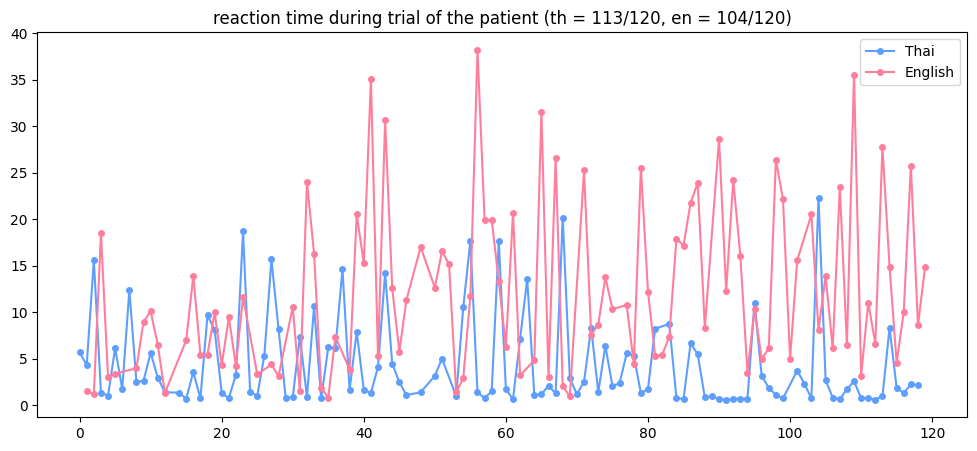

In [29]:
extractth = ptth_filter['key_resp.rt']
extracten = pten_filter['key_resp.rt']
plt.figure(figsize=(12,5))
plt.plot(extractth.index, extractth.values, marker = 'o', markersize = 4, color = bluegradient[2], label = 'Thai')
plt.plot(extracten.index, extracten.values, marker = 'o', markersize = 4, color = redgradient[2], label = 'English')
plt.legend()
plt.title(f"reaction time during trial of the patient (th = {len(extractth)}/120, en = {len(extracten)}/120)")

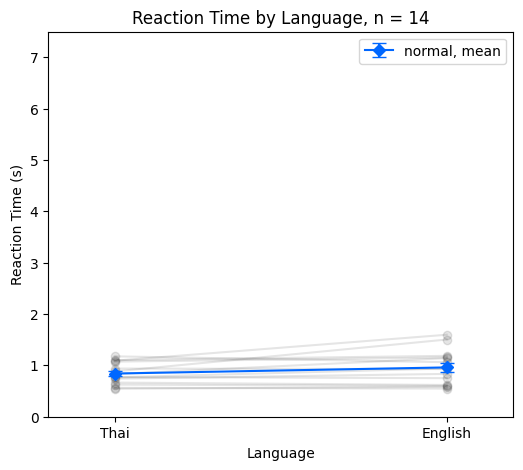

In [121]:
# normal
normmean = normall_filter.groupby(['lang','username'])['key_resp.rt'].mean().unstack()
plt.figure(figsize=(6,5))
for ind, ser in normmean.items():
    plt.plot(ser.index, ser.values, marker = 'o', color = 'black', alpha =0.1)

# normal mean
mean = normmean.T.mean()
sem = normmean.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, color = bluegradient[4], marker = 'D', capsize = 5 , label = 'normal, mean')

# patient
# mean = ptall.groupby('lang')['key_resp.rt'].median() ### chnage to median
# sem = ptall.groupby('lang')['key_resp.rt'].sem()
# plt.errorbar(mean.index, mean.values, yerr = sem.values, color = patient, marker = 'o', capsize = 5 , label = 'patient')
plt.ylabel("Reaction Time (s)")
plt.title(f"Reaction Time by Language, n = {n_subj}" )
plt.xlabel('Language')
plt.xticks([1,2], ["Thai", "English"])
plt.ylim(0,7.5)
# save_plot( "reaction time by language")
plt.margins(x=0.2)
legend_unique()
# plt.savefig("./figure/norm/II norm RT by lang.png")

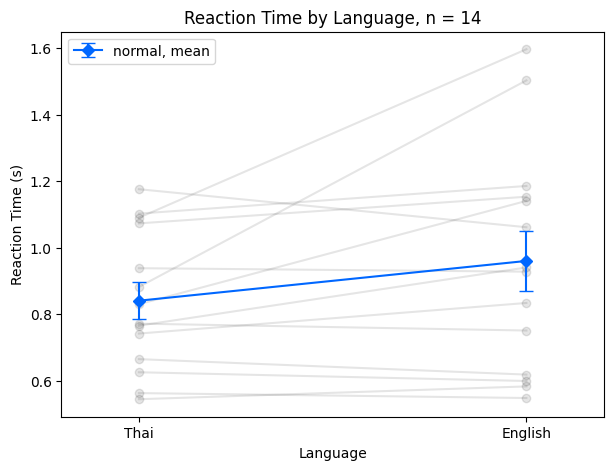

In [131]:
# normal
normmean = normall_filter.groupby(['lang','username'])['key_resp.rt'].mean().unstack()
plt.figure(figsize = (7,5))
for ind, ser in normmean.items():
    plt.plot(ser.index, ser.values, marker = 'o', color = 'black', alpha =0.1)


# normal mean
mean = normmean.T.mean()
sem = normmean.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, color = bluegradient[4], marker = 'D', capsize = 5 , label = 'normal, mean')

# patient
# mean = ptall.groupby('lang')['key_resp.rt'].median() ### chnage to median
# sem = ptall.groupby('lang')['key_resp.rt'].sem()
# plt.errorbar(mean.index, mean.values, yerr = sem.values, color = patient, marker = 'o', capsize = 5 , label = 'patient')
plt.ylabel("Reaction Time (s)")
plt.title(f"Reaction Time by Language, n = {n_subj}" )
plt.xlabel('Language')
plt.xticks([1,2], ["Thai", "English"])
# plt.ylim(0,7.5)
# save_plot( "reaction time by language")
plt.margins(x=0.2)
legend_unique()
# plt.savefig("./figure/norm/II norm RT by lang.png")

Freedman-Diaconis Rule AND Create BOX plot AND Histogram

In [25]:
import matplotlib.font_manager as fm
thai_font_path="./THSarabun.ttf"
def II_plot_RT_outliers(df, lang, title,  ylim = None,save_path=None):
    RT = 'key_resp.rt'
    # Calculate outlier thresholds using IQR method
    # Q1 = df[RT].quantile(0.25)
    # Q3 = df[RT].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    # # Find outliers
    # outliers = df[(df[RT] < lower_bound) | (df[RT] > upper_bound)]
    # outliers.sort_values(by=[RT], inplace = True)

    # Create the plot
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})

    # Boxplot (Top)
    sns.boxplot(data=df, x=RT, ax=axes[0], color='lightgray')
    axes[0].set_title(title)
    axes[0].set_xlabel('')
    axes[0].set_xlim(0,20)
#     # Annotate outliers with the corresponding 'word shown' using the Thai font if provided
#     prop = fm.FontProperties(fname=thai_font_path)
#     i = 0
#     for outlier_value, word in zip(outliers[RT], outliers['word shown']):
#         yax = 0 + 0.25 * ((-1) ** i)
#         axes[0].text(outlier_value, yax, word, fontsize=10, ha='center', va = 'center',color='black', fontweight='light', rotation=90, fontproperties=prop)
#         i = i + 1
# # 
    # axes[0].set_yticks([])  # Hide y-axis ticks
    # axes[0].set_xlabel("")  # Remove x-axis label

    # Histogram (Bottom)

    num_bins = 20
    colorchoice = bluegradient[4] if lang == 'th' else redgradient[4] if lang == 'en' else gaygradient[4] 
    axes[1].hist(df[RT], bins=num_bins,range = (0,20) ,color=colorchoice, alpha=0.7, edgecolor='black')
    axes[1].set_title('')
    axes[1].set_xlabel("Reaction Time (s)")
    axes[1].set_ylabel("Frequency")
    # axes[1].set_xticks(np.arange(0,16,1))
    axes[1].set_xlim(0,20)
    if ylim != None:
        axes[1].set_ylim(0,ylim)




In [26]:
II_plot_RT_outliers(normall_filter, '',"Reaction Time Choosing word")
II_plot_RT_outliers(normall_filter[normall_filter['lang'] == 1], 'th',"Reaction Time Choosing Image: Thai")
II_plot_RT_outliers(normall_filter[normall_filter['lang'] == 2], 'en',"Reaction Time Choosing Image: Thai")
# II_plot_RT_outliers(datafilter[datafilter['Language'] == 'English'], 'en',"Reaction Time Choosing Image: English", ylim=60)

NameError: name 'normall_filter' is not defined

Language VS Reaction Time Histogram

# Word Length vs Reaction Time Graphs

([<matplotlib.axis.XTick at 0x1f3da61ba90>,
 [Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

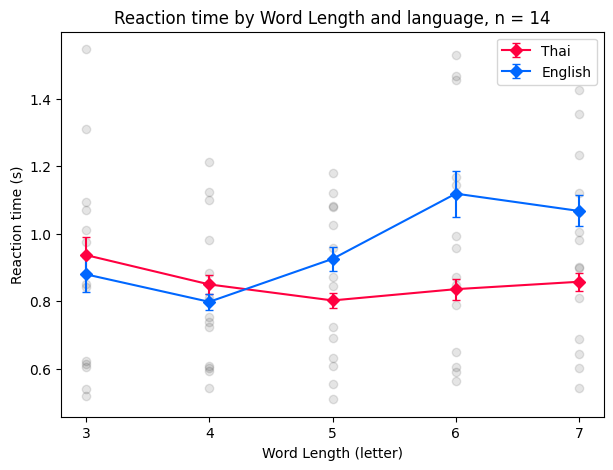

In [130]:
# norm
norm_df = normall_filter.groupby(['word_length', 'username'])['key_resp.rt'].mean().unstack()
sem_df = norm_df.T.sem()

plt.figure(figsize = (7,5))
for i, (user, accubylen) in enumerate(norm_df.items()):
    plt.scatter(accubylen.index, accubylen.values, color = 'black', alpha = 0.1, marker = 'o')

# mean of all user
mean_df = normall_filter.groupby('word_length')['key_resp.rt'].mean()
meanth = normth_filter.groupby('word_length')['key_resp.rt'].mean()
semth = normth_filter.groupby('word_length')['key_resp.rt'].sem()

plt.errorbar(meanth.index, meanth.values, yerr = semth.values, color = redgradient[4], marker =  'D', capsize = 3, label = 'Thai')

meanen = normen_filter.groupby('word_length')['key_resp.rt'].mean()
semen = normen_filter.groupby('word_length')['key_resp.rt'].sem()
plt.errorbar(meanen.index, meanen.values, yerr = semen.values, color = bluegradient[4], marker =  'D', capsize = 3, label = 'English')

# patient
# patientmean_df = ptall_filter.groupby('word_length')['key_resp.rt'].mean()
# sem = ptall_filter.groupby('word_length')['key_resp.rt'].sem()
# print(patientmean_df)

# plt.errorbar(patientmean_df.index, patientmean_df.values, yerr = sem.values, marker = 'o', capsize= 5, color = patient, label = 'patient')


# Labels and title
plt.ylabel("Reaction time (s)")
plt.xlabel("Word Length (letter)")
plt.title(f"Reaction time by Word Length and language, n = {n_subj}")
legend_unique()
plt.xticks(np.arange(3,8,1))
# plt.ylim(0,10)
# plt.savefig("./figure/norm/II norm RT by wordlen.png")


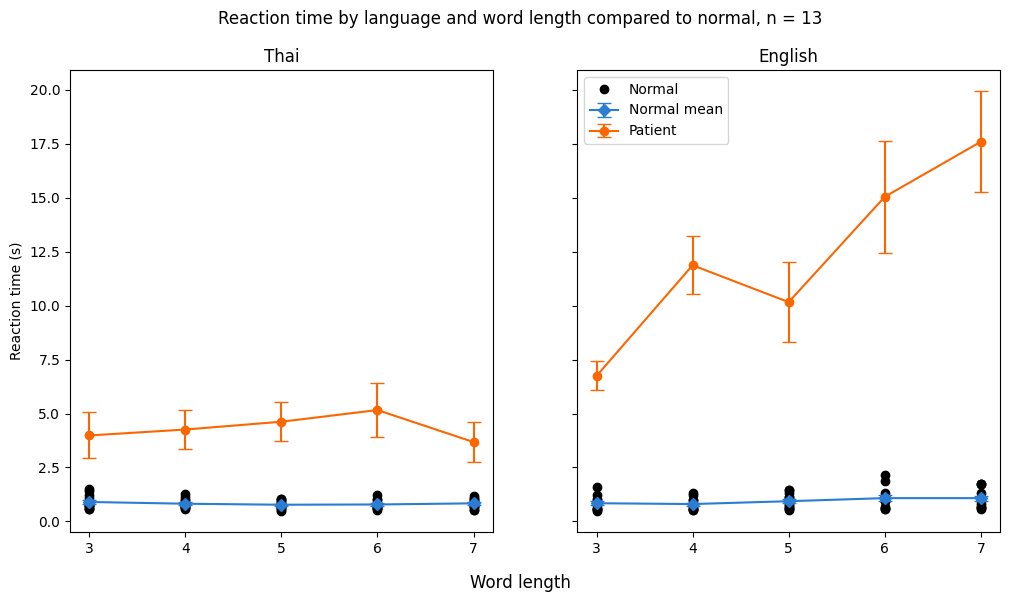

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['key_resp.rt'].mean().unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['key_resp.rt'].mean()
    s = lister[i][1].groupby(['word_length'])['key_resp.rt'].sem()
    axs[i].errorbar(p.index, p.values, yerr = s.values, capsize = 5, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Reaction time by language and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Reaction time (s)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()

plt.savefig("./figure/norm/II norm RT by wordlen and lang.png")


stimuli       Correct    Pseudo  Scramble
word_length                              
3            4.065084  9.416750  1.185072
4            5.788866  2.716789  4.046349
5            4.474146  4.651686  4.719605
6            7.151815  7.190248  1.641826
7            8.573472  1.943215  1.006596
stimuli        Correct     Pseudo   Scramble
word_length                                 
3             4.553484   7.443294   8.310753
4            11.273843  13.925576  10.323337
5             8.682310  14.872502   5.995269
6            24.176494  15.858381   7.562668
7            13.910945  17.590963  19.415746


Text(0.5, 0.98, 'Reaction time by language, word length, and stimuli type, n = 13')

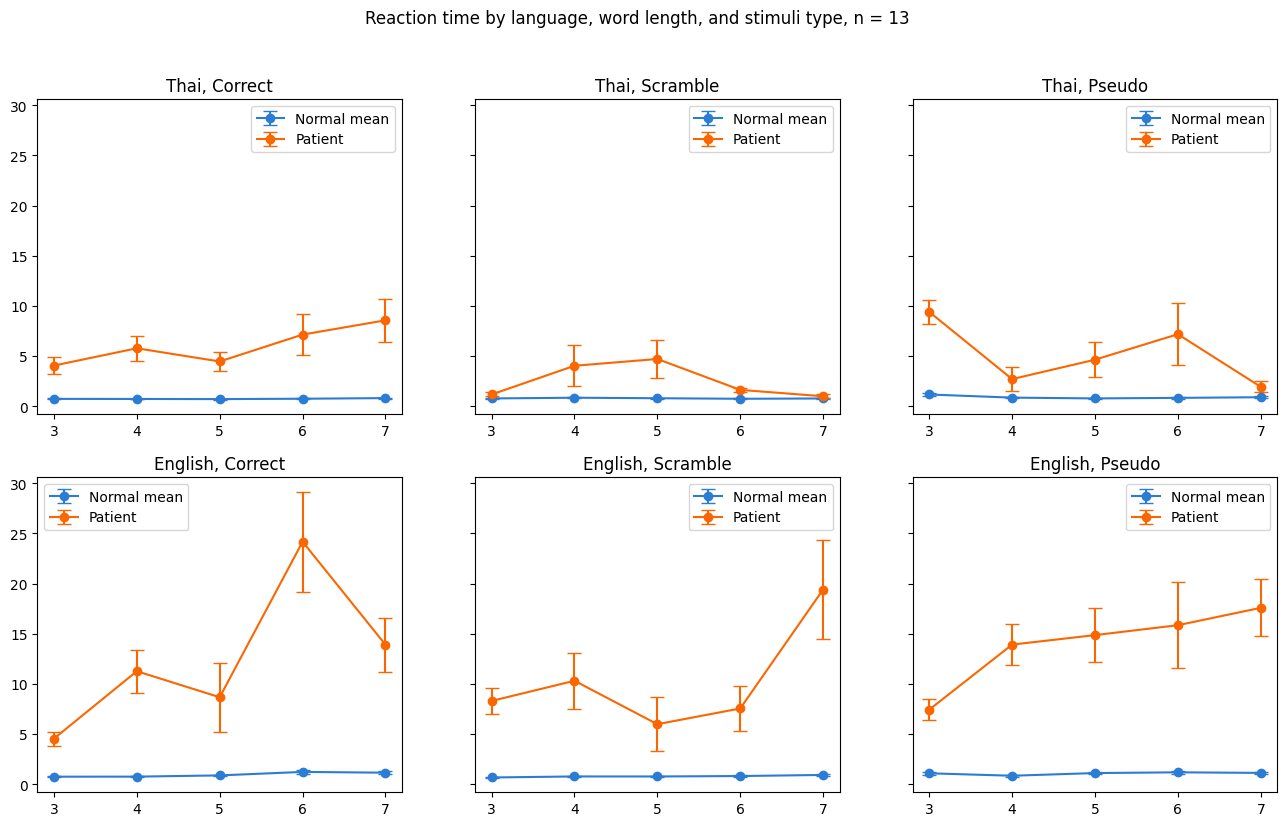

In [142]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (16,9), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
stimuli_ord = ["Correct", 'Scramble', 'Pseudo']
for i in [0,1]:

    # normal
    d = lister[i][0].groupby(['stimuli','word_length', 'username'])['key_resp.rt'].mean()
    m = d.groupby(['stimuli','word_length']).agg(['mean', 'sem']).unstack()
    meandf = m['mean'].T
    semdf = m['sem'].T

    # patient
    p = lister[i][1].groupby(['stimuli','word_length'])['key_resp.rt'].mean().unstack().T
    psem = lister[i][1].groupby(['stimuli','word_length'])['key_resp.rt'].sem().unstack().T
    print(p)
    for j in [0,1,2]:
        lang = 'Thai' if i == 0 else 'English'
        axs[i, j].errorbar(meandf[stimuli_ord[j]].index, meandf[stimuli_ord[j]].values, yerr = semdf[stimuli_ord[j]].values, 
                           color = normcolor, marker = 'o', capsize = 5, label = f'Normal mean')
        axs[i, j].errorbar(p[stimuli_ord[j]].index, p[stimuli_ord[j]].values, yerr = psem[stimuli_ord[j]].values,
                           color = patient, marker = 'o', capsize = 5, label = f'Patient')
        axs[i, j].legend()
        axs[i, j].set_title(f"{lang}, {stimuli_ord[j]}")
plt.suptitle(f"Reaction time by language, word length, and stimuli type, n = {n_subj}")

#     mean, sem = d.T.mean(), d.T.sem()
#     axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = normcolor, capsize = 5, label = 'Normal mean')
#     p = lister[i][1].groupby(['word_length'])['score'].mean().mul(100)
#     s = lister[i][1].groupby(['word_length'])['score'].sem().mul(100)
#     axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

# fig.suptitle(f"Accuracy by language and word length compared to normal, n = {n_subj}")
# fig.supxlabel("Word length")
# axs[0].set_ylabel("Accuracy (%)")
# axs[0].set_title("Thai")
# axs[1].set_title("English")
# axs[0].set_xticks([3,4,5,6,7])
# axs[1].set_xticks([3,4,5,6,7])
# legend_unique()

# # plt.savefig("./figure/norm/II norm accu by wordlen and lang.png")


# Stimuli Type vs Reaction Time Graphs

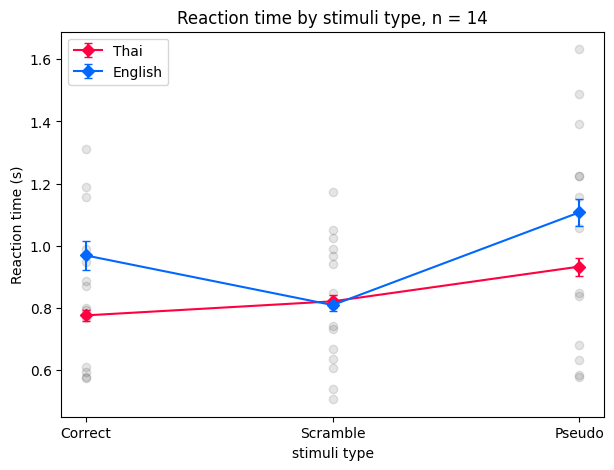

In [127]:
# normal
normmean = normall_filter.groupby(['stimuli', 'username'])['key_resp.rt'].mean().unstack()
normmean = normmean.reindex(stimuli_ord, level='stimuli')

plt.figure(figsize=(7,5))
for ind, ser in normmean.items():
    plt.scatter(ser.index, ser.values, color = 'black', alpha = 0.1)

# normal mean
tempth = normth_filter.groupby('stimuli')['key_resp.rt'].mean()
tempth = tempth.reindex(stimuli_ord, level = 'stimuli')
semth = normth_filter.groupby('stimuli')['key_resp.rt'].sem()
semth = semth.reindex(stimuli_ord, level = 'stimuli')
plt.errorbar(tempth.index, tempth.values, yerr = semth.values, color = redgradient[4], marker = 'D', capsize = 3, label = 'Thai')

tempen = normen_filter.groupby('stimuli')['key_resp.rt'].mean()
tempen = tempen.reindex(stimuli_ord, level = 'stimuli')
semen = normen_filter.groupby('stimuli')['key_resp.rt'].sem()
semen = semen.reindex(stimuli_ord, level = 'stimuli')
plt.errorbar(tempen.index, tempen.values, yerr = semen.values, color = bluegradient[4], marker = 'D', capsize = 3, label = 'English')

# # patient
# ptmean = ptall_filter.groupby('stimuli')['key_resp.rt'].mean()
# ptmean = ptmean.reindex(stimuli_ord, level = 'stimuli')
# ptsem = ptall_filter.groupby('stimuli')['key_resp.rt'].sem()
# ptsem = ptsem.reindex(stimuli_ord, level = 'stimuli')

# plt.errorbar(ptmean.index, ptmean.values,yerr = ptsem.values,  marker = 'o', capsize= 5, color = patient, label = 'patient')
plt.title(f"Reaction time by stimuli type, n = {n_subj}")
plt.ylabel("Reaction time (s)")
plt.xlabel("stimuli type")
legend_unique()
# plt.savefig("./figure/norm/II norm RT by stimuli.png")

---

## Histogram plot of the mean

In [181]:
import matplotlib.font_manager as fm
import math
thai_font_path="./THSarabun.ttf"
def histogramplot(inidf, lang, title, xlim=None):

    df = inidf.rename(columns={'key_resp.rt':'key_RT'})


    # Calculate outlier thresholds using IQR method
    Q1 = df['key_RT'].quantile(0.25)
    Q3 = df['key_RT'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df['key_RT'] < lower_bound) | (df['key_RT'] > upper_bound)]
    outliers.sort_values(by=['key_RT'], inplace = True)


    # Create the plot
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})

    #create x limit for global
    if xlim is None:
        x_lim = math.ceil(max(df['key_RT']))
    else:
        x_lim = xlim
    
    print(x_lim)

    # Boxplot (Top)
    sns.boxplot(data=df, x='key_RT', ax=axes[0], color='lightgray')
    axes[0].set_title(title)
    axes[0].set_xlabel('')
    axes[0].set_xticks(np.arange(0,x_lim+1,1))
    axes[0].set_xlim(0,x_lim)
    # axes[0].set_xticks(np.arange(0,16,1))

    # Annotate outliers with the corresponding 'word shown' using the Thai font if provided
    # prop = fm.FontProperties(fname=thai_font_path)
    # i = 0
    # for outlier_value, word in zip(outliers['key_RT'], outliers['word shown']):
    #     yax = 0 + 0.25 * ((-1) ** i)
    #     axes[0].text(outlier_value, yax, word, fontsize=10, ha='center', va = 'center',color='black', fontweight='light', rotation=90, fontproperties=prop)
    #     i = i + 1
# 
    # axes[0].set_yticks([])  # Hide y-axis ticks
    # axes[0].set_xlabel("")  # Remove x-axis label

    # Histogram (Bottom)
    colorchoice = thaicolor if lang == 'th' else engcolor if lang == 'en' else gaygradient[4] 
    axes[1].hist(df['key_RT'], bins=range(0, x_lim + 1, 1),color=colorchoice, alpha=0.7, edgecolor='black')
    axes[1].set_xlabel("Reaction Time (s)")
    
    axes[1].set_xticks(np.arange(0,x_lim+1,1))
    axes[1].set_xlim(0,x_lim)
    axes[1].set_ylabel("Frequency")
    # axes[1].set_xticks(np.arange(0,20,1))
    # axes[1].set_xlim(0,15)
    # axes[1].set_ylim(0,ylim)

    # # Save the plot if save_path is provided
    # if save_path:
    #     plt.savefig(save_path, bbox_inches='tight', dpi=300)
    #     print(f"Plot saved to {save_path}")

    # plt.close()  # Prevent displaying the plot



C:\Users\UserPC\AppData\Local\Temp\ipykernel_21060\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.sort_values(by=['key_RT'], inplace = True)
C:\Users\UserPC\AppData\Local\Temp\ipykernel_21060\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.sort_values(by=['key_RT'], inplace = True)
C:\Users\UserPC\AppData\Local\Temp\ipykernel_21060\1579349288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

17
17
17


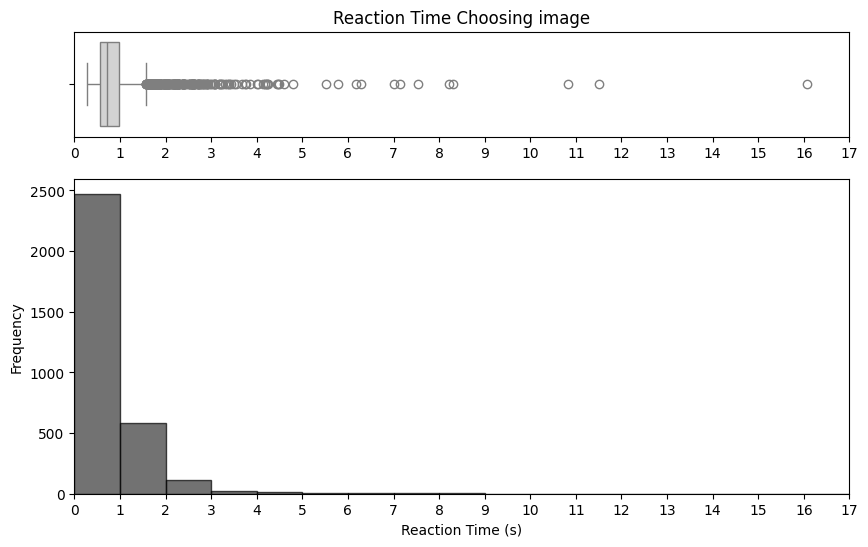

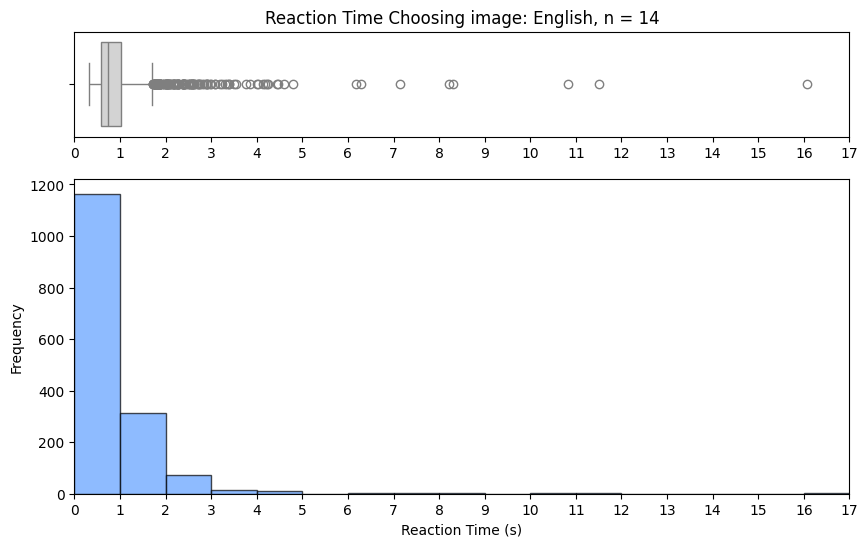

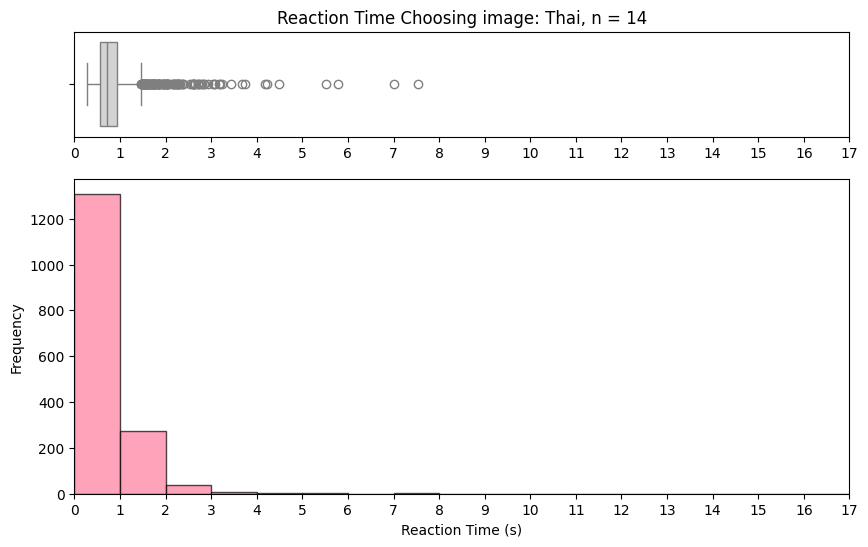

In [183]:
histogramplot(normall_filter, 'General', title="Reaction Time Choosing image")
histogramplot(normen_filter, 'en', title="Reaction Time Choosing image: English, n = 14")
histogramplot(normth_filter, 'th', title="Reaction Time Choosing image: Thai, n = 14", xlim = 17)